# Measuring galaxy properties

In the previous lesson, you've learned how to create fake galaxies using the BAGPIPES code. You will now learn how we can learn about the properties of galaxies by comparing the light from real galaxies with the "fake light" from the models.



# 1. Setting up Google Colab

Just like in the previous lesson, we will have to install BAGPIPES in our runtime and load the required data. We will go a bit fast through this process as you are already experts on it.

Install and import BAGPIPES:

In [ ]:
!pip install bagpipes
import bagpipes as pipes

Connect to Google Drive and set paths:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

pcto_dir = '/content/drive/MyDrive/BAGPIPES_activity/'
data_dir = pcto_dir + 'Data/'

Import functions from `black_box.py` (Note that the file was updated):

In [ ]:
import sys
sys.path.append(pcto_dir)

from black_box import plot_filters, plot_sfh, plot_model, plot_model_unphysical, plot_observation, plot_model_and_observation, read_hst_photometry

Read and plot filter files:

**Golden rule: always plot things before you use them**

In [ ]:
filter_dir = data_dir + 'Filters/'

hst_filters = ['F275W', 'F336W', 'F606W', 'F680N', 'F814W']

filter_files = [filter_dir + 'HST_WFC3_UVIS2.F275W.dat',
                filter_dir + 'HST_WFC3_UVIS2.F336W.dat',
                filter_dir + 'HST_WFC3_UVIS2.F606W.dat',
                filter_dir + 'HST_WFC3_UVIS2.F680N.dat',
                filter_dir + 'HST_WFC3_UVIS2.F814W.dat']

plot_filters(filter_files, hst_filters)

# 2. Loading Data of a Real Galaxy

Today we will be studying the galaxy JO175, more specifically the images of this galaxy that we took using the [Hubble Space Telescope](https://www.nasa.gov/mission_pages/hubble/about)

I asked one of our students, Eric Giuchi, to measure the flux (energy of light/time) coming from two regions of the galaxy. He also prepared the image below highlighting these two regions.


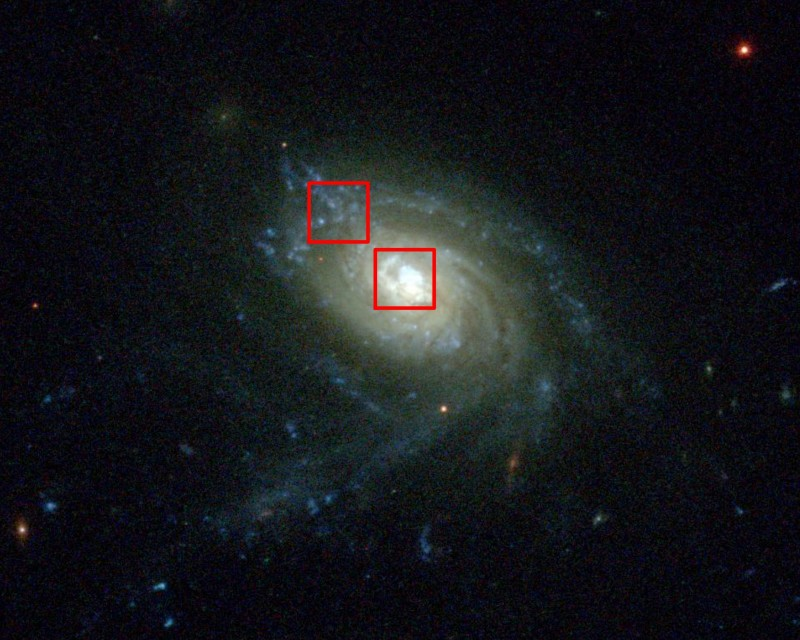

The region in the middle samples the bulge of the galaxy, while the other one samples mostly the disk.

The data for these two regions are in the files `JO175_bulge_PCTO.dat` and `JO175_disk_PCTO.dat` included in the data directory:

In [ ]:
import os
os.listdir(data_dir)

The files are tables with two columns (fluxes and measurement errors) and five lines corresponding to each of the HST filters that we are using. You can read the files using the function `read_hst_photometry`. Note that the function gives out two outputs (fluxes and errors).

[Photometry](https://en.wikipedia.org/wiki/Photometry_(astronomy)) is the process of measuring how much light is coming from an astronomical object through a given filter.

In [ ]:
read_hst_photometry?

In [ ]:
flux, error = read_hst_photometry('bulge', data_dir=data_dir)
print(flux)
print(error)

In [ ]:
flux, error = read_hst_photometry('bulge')
print(flux)
print(error)

Each of of these filters will measure the typical flux in a limited wavelength range, producing a sort of low budget spectrum of only 5 points.

To see these 5 fluxes and their corresponding wavelengths, run the cell below:

In [ ]:
plot_observation('disk', filter_files, data_dir=data_dir, show_filters=True)

In [ ]:
plot_observation('bulge', filter_files, data_dir=data_dir, show_filters=True)

# 3. Measuring Galaxy Properties

We will now measurre the properties of the two regions (bulge and disk) of a real galaxy.

Throughout this process you may have to use the commands `plt.xlim` and `plt.ylim` of the `matplotlib` module, so let's import it to set things up:

In [ ]:
import matplotlib.pyplot as plt

Now let's start!

With the command `plot_model_and_observation` you will chose one of the regions (bulge or disk) and set the parameters of a BAGPIPES model to compare with the observation. Let's see if we can find the model that best describes the observed data points.

In [ ]:
plot_model_and_observation(region='bulge', age=5.3, tau=2.8, mass=10.05, Av=0.2, redshift=0.04675, filters=filter_files)
plt.ylim(0, 1e-15)
plot_sfh(age=5.3, tau=2.8, mass=10.1)